In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.precision", 6)

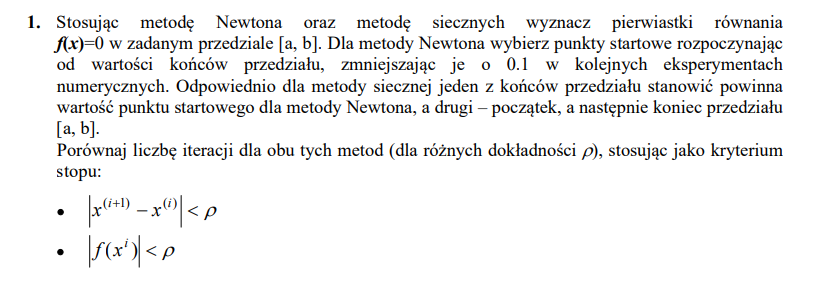
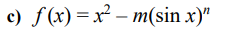
### n = 15 ; m = 10
### a = -1.8 ; b = 0.2

In [2]:
N = 15
M = 10
A = -1.8
B = 0.2

In [3]:
def f(x):
    return x**2 - M*(np.sin(x))**N

In [4]:
def df(x):
    return 2*x - M*N*np.cos(x)*np.sin(x)**(N-1)

In [5]:
def plot(space, *functions, points=None, title=None):
    plt.rcParams['figure.figsize'] = [9, 6]

    if points != None:
        plt.scatter(points[0], points[1], label="nodes")
    for foo, lbl, line in functions:
        plt.plot(space, foo(space), line, label=lbl)

    if title:
        plt.title(title, y=-0.12)

    plt.legend(bbox_to_anchor=(0.85, 0.23), loc='upper left', borderaxespad=0)
    plt.grid()
    plt.show()

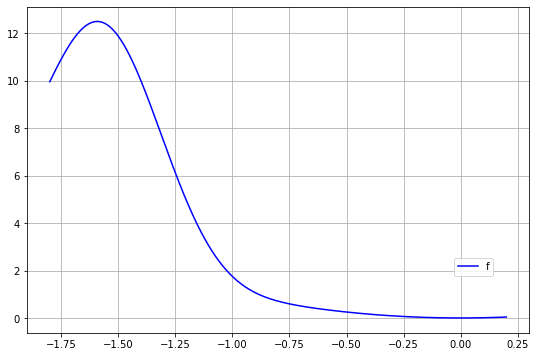

In [6]:
plot(np.linspace(A, B, 1000), [f, 'f', 'b-'])

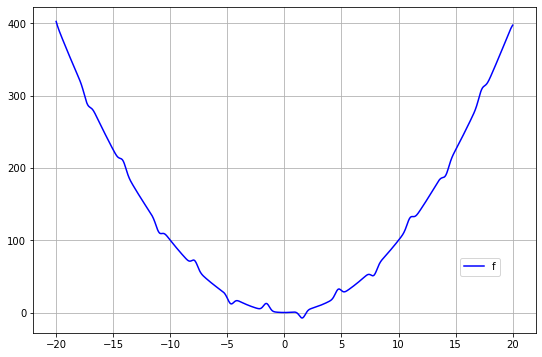

In [13]:
plot(np.linspace(-20, 20, 1000), [f, 'f', 'b-'])

In [7]:
def newton(f,df,x0,epsilon, max_iterations, stop_cryterium):
    xn = x0
    for n in range(max_iterations):
        fxn = f(xn)
        if stop_cryterium == "abs" and abs(fxn) < epsilon:
#             print('Found solution after',n,'iterations.')
            return xn, n
        Dfxn = df(xn)
        if Dfxn == 0:
#             print('Derivative equal to zero, no solution found')
            return 'x', 'x'
        if stop_cryterium == "points" and abs(fxn/Dfxn) < epsilon:
#             print('Found solution after',n,'iterations.')
            return xn, n
        xn = xn - fxn/Dfxn
    return 'x', 'x'

In [8]:
def secant(f, x1, x2, epsilon, max_iterations, stop_cryterium):
    for n in range(max_iterations):
        if f(x1) == f(x2):
            return 'x', 'x'
        x1, x2 = x2, x2 - (x2-x1)*f(x2)/(f(x2) - f(x1))
        
        if stop_cryterium == "abs" and abs(f(x2)) < epsilon:
#             print(f"converged after {n} iterations")
            return x2, n
        elif stop_cryterium == "points" and abs(x1 - x2) < epsilon:
#             print(f"converged after {n} iterations")
            return x2, n
        
    print("didnt converge")
    return 'x', 'x'

In [9]:
epsilons = [0.01, 0.0001, 0.000001, 0.0000000001]
xs = np.arange(A, B+0.1, 0.1)
max_iterations = 1000

In [10]:
def save(filename, results):
    filename += '.xlsx'
    DF = pd.DataFrame(data=results)
#     DF.columns = [" ", *epsilons]
#     DF = DF[1:]
    DF.to_csv(filename, index=False, header=False)
    results = [epsilons]
    print(DF)
    return DF

In [11]:
dataframe = [epsilons]
for x0 in xs:
    res = [x0]
    for epsilon in epsilons:
        root, n = newton(f, df, x0, epsilon, max_iterations, "abs")
        res.append(n)
    dataframe.append(res)
save("newton abs", dataframe)

dataframe = [epsilons]
for x0 in xs:c
    res = [x0]
    for epsilon in epsilons: 
        root, n = newton(f, df, x0, epsilon, max_iterations, "points")  
        res.append(n)
    dataframe.append(res)
save("newton points", dataframe)

               0       1          2             3     4
0   1.000000e-02  0.0001   0.000001  1.000000e-10   NaN
1  -1.800000e+00  5.0000   8.000000  1.100000e+01  18.0
2  -1.700000e+00  8.0000  11.000000  1.500000e+01  21.0
3  -1.600000e+00  8.0000  11.000000  1.500000e+01  21.0
4  -1.500000e+00  4.0000   7.000000  1.100000e+01  17.0
5  -1.400000e+00  6.0000   9.000000  1.200000e+01  19.0
6  -1.300000e+00  6.0000   9.000000  1.300000e+01  19.0
7  -1.200000e+00  6.0000   9.000000  1.300000e+01  19.0
8  -1.100000e+00  5.0000   9.000000  1.200000e+01  19.0
9  -1.000000e+00  5.0000   8.000000  1.200000e+01  18.0
10 -9.000000e-01  4.0000   8.000000  1.100000e+01  18.0
11 -8.000000e-01  4.0000   7.000000  1.100000e+01  17.0
12 -7.000000e-01  3.0000   7.000000  1.000000e+01  17.0
13 -6.000000e-01  3.0000   6.000000  1.000000e+01  16.0
14 -5.000000e-01  3.0000   6.000000  9.000000e+00  16.0
15 -4.000000e-01  3.0000   6.000000  9.000000e+00  16.0
16 -3.000000e-01  2.0000   5.000000  9.000000e+0

,0,1,2,3,4
0,1.000000e-02,0.0001,0.000001,1.000000e-10,NaN
1,-1.800000e+00,7.0000,14.000000,2.000000e+01,34.0
2,-1.700000e+00,10.0000,17.000000,2.400000e+01,37.0
3,-1.600000e+00,10.0000,17.000000,2.400000e+01,37.0
4,-1.500000e+00,6.0000,13.000000,2.000000e+01,33.0
5,-1.400000e+00,8.0000,15.000000,2.100000e+01,35.0
6,-1.300000e+00,8.0000,15.000000,2.200000e+01,35.0
7,-1.200000e+00,8.0000,15.000000,2.100000e+01,35.0
8,-1.100000e+00,8.0000,14.000000,2.100000e+01,34.0
9,-1.000000e+00,7.0000,14.000000,2.100000e+01,34.0


In [15]:
dataframe = [epsilons]
for x0 in xs:
    res = [x0]
    for epsilon in epsilons:
        root, n = newton(f, df, x0, epsilon, max_iterations, "abs")
        res.append(root)
    dataframe.append(res)
save("newton abs root", dataframe)

dataframe = [epsilons]
for x0 in xs:
    res = [x0]
    for epsilon in epsilons: 
        root, n = newton(f, df, x0, epsilon, max_iterations, "points")  
        res.append(root)
    dataframe.append(res)
save("newton points root", dataframe)

               0             1             2             3             4
0   1.000000e-02  1.000000e-04  1.000000e-06  1.000000e-10           NaN
1  -1.800000e+00 -5.891604e-02 -7.364505e-03 -9.205632e-04 -7.191900e-06
2  -1.700000e+00 -7.169727e-02 -8.962158e-03 -5.601349e-04 -8.752108e-06
3  -1.600000e+00  7.486117e-02  9.357647e-03  5.848529e-04  9.138327e-06
4  -1.500000e+00 -7.761801e-02 -9.702252e-03 -6.063907e-04 -9.474855e-06
5  -1.400000e+00 -6.281910e-02 -7.852388e-03 -9.815485e-04 -7.668348e-06
6  -1.300000e+00 -7.350394e-02 -9.187992e-03 -5.742495e-04 -8.972649e-06
7  -1.200000e+00 -6.447820e-02 -8.059775e-03 -5.037359e-04 -7.870874e-06
8  -1.100000e+00 -9.716304e-02 -6.072690e-03 -7.590863e-04 -5.930361e-06
9  -1.000000e+00 -6.856194e-02 -8.570243e-03 -5.356402e-04 -8.369378e-06
10 -9.000000e-01 -9.327696e-02 -5.829810e-03 -7.287263e-04 -5.693174e-06
11 -8.000000e-01 -6.637564e-02 -8.296956e-03 -5.185597e-04 -8.102496e-06
12 -7.000000e-01 -9.839807e-02 -6.149879e-03 -7.687

,0,1,2,3,4
0,1.000000e-02,1.000000e-04,1.000000e-06,1.000000e-10,NaN
1,-1.800000e+00,-1.472901e-02,-1.150704e-04,-1.797975e-06,-1.097397e-10
2,-1.700000e+00,-1.792432e-02,-1.400337e-04,-1.094013e-06,-1.335466e-10
3,-1.600000e+00,1.871529e-02,1.462132e-04,1.142291e-06,1.394398e-10
4,-1.500000e+00,-1.940450e-02,-1.515977e-04,-1.184357e-06,-1.445748e-10
5,-1.400000e+00,-1.570478e-02,-1.226936e-04,-1.917087e-06,-1.170097e-10
6,-1.300000e+00,-1.837598e-02,-1.435624e-04,-1.121581e-06,-1.369118e-10
7,-1.200000e+00,-1.611955e-02,-1.259340e-04,-1.967719e-06,-1.201000e-10
8,-1.100000e+00,-1.214538e-02,-1.897716e-04,-1.482590e-06,-1.809803e-10
9,-1.000000e+00,-1.714049e-02,-1.339100e-04,-1.046172e-06,-1.277066e-10


In [24]:
dataframe = [epsilons]
for x0 in xs:
    res = [f"[{x0:.1f} : {B}]"]
    for epsilon in epsilons:
        root, n = secant(f, x0, B, epsilon, max_iterations, 'abs')
        res.append(n)
    dataframe.append(res)
for x0 in xs:
    res = [f"[{A} : {x0:.1f}]"]
    for epsilon in epsilons:
        root, n = secant(f, A, x0, epsilon, max_iterations, 'abs')
        res.append(n)
    dataframe.append(res)
save("secant abs", dataframe)

dataframe = [epsilons]
for x0 in xs:
    res = [f"[{x0:.1f} : {B}]"]
    for epsilon in epsilons:
        root, n = secant(f, x0, B, epsilon, max_iterations, 'points')
        res.append(n)
    dataframe.append(res)
for x0 in xs:
    res = [f"[{A} : {x0:.1f}]"]
    for epsilon in epsilons:
        root, n = secant(f, A, x0, epsilon, max_iterations, 'points')
        res.append(n)
    dataframe.append(res)
save("secant points", dataframe)


                0       1         2    3     4
0            0.01  0.0001  0.000001  0.0  None
1    [-1.8 : 0.2]       2         6   11    21
2    [-1.7 : 0.2]       2         6   11    21
3    [-1.6 : 0.2]       2         6   11    21
4    [-1.5 : 0.2]       2         6   11    21
5    [-1.4 : 0.2]       2         6   11    21
6    [-1.3 : 0.2]       2         6   11    21
7    [-1.2 : 0.2]       2         6   11    21
8    [-1.1 : 0.2]       2         7   11    21
9    [-1.0 : 0.2]       2         7   11    21
10   [-0.9 : 0.2]       2         7   11    21
11   [-0.8 : 0.2]       2         7   12    21
12   [-0.7 : 0.2]       2         7   12    21
13   [-0.6 : 0.2]       2         7   12    21
14   [-0.5 : 0.2]       2         7   12    21
15   [-0.4 : 0.2]       2         7   12    22
16   [-0.3 : 0.2]       3         7   12    22
17   [-0.2 : 0.2]       3         8   13    23
18   [-0.1 : 0.2]       5         9   14    24
19    [0.0 : 0.2]       0         0    0     0
20    [0.1 : 

,0,1,2,3,4
0,0.01,0.0001,0.000001,0.0,None
1,[-1.8 : 0.2],0,15,25,44
2,[-1.7 : 0.2],0,15,25,44
3,[-1.6 : 0.2],0,15,25,44
4,[-1.5 : 0.2],0,15,25,44
5,[-1.4 : 0.2],0,15,25,44
6,[-1.3 : 0.2],0,15,25,44
7,[-1.2 : 0.2],5,15,25,44
8,[-1.1 : 0.2],6,15,25,44
9,[-1.0 : 0.2],6,15,25,44


In [28]:
dataframe = [epsilons]
for x0 in xs:
    res = [f"[{x0:.1f} : {B}]"]
    for epsilon in epsilons:
        root, n = secant(f, x0, B, epsilon, max_iterations, 'abs')
        res.append(root)
    dataframe.append(res)
for x0 in xs:
    res = [f"[{A} : {x0:.1f}]"]
    for epsilon in epsilons:
        root, n = secant(f, A, x0, epsilon, max_iterations, 'abs')
        res.append(root)
    dataframe.append(res)
save("secant abs roots", dataframe)

dataframe = [epsilons]
for x0 in xs:
    res = [f"[{x0:.1f} : {B}]"]
    for epsilon in epsilons:
        root, n = secant(f, x0, B, epsilon, max_iterations, 'points')
        res.append(root)
    dataframe.append(res)
for x0 in xs:
    res = [f"[{A} : {x0:.1f}]"]
    for epsilon in epsilons:
        root, n = secant(f, A, x0, epsilon, max_iterations, 'points')
        res.append(root)
    dataframe.append(res)
save("secant points roots", dataframe)


                0         1         2         3         4
0            0.01    0.0001  0.000001       0.0      None
1    [-1.8 : 0.2]  0.068435  0.009758  0.000879  0.000007
2    [-1.7 : 0.2]  0.068098  0.009713  0.000875  0.000007
3    [-1.6 : 0.2]  0.067939  0.009692  0.000874  0.000007
4    [-1.5 : 0.2]  0.067931  0.009691  0.000873  0.000007
5    [-1.4 : 0.2]  0.068081  0.009711  0.000875  0.000007
6    [-1.3 : 0.2]  0.068449   0.00976   0.00088  0.000007
7    [-1.2 : 0.2]  0.069169  0.009855  0.000888  0.000007
8    [-1.1 : 0.2]  0.070476  0.006192  0.000904  0.000007
9    [-1.0 : 0.2]  0.072623  0.006366  0.000929  0.000008
10   [-0.9 : 0.2]  0.075557  0.006602  0.000963  0.000008
11   [-0.8 : 0.2]  0.078757  0.006858  0.000619  0.000008
12   [-0.7 : 0.2]  0.081944  0.007111  0.000641  0.000008
13   [-0.6 : 0.2]  0.085618    0.0074  0.000667  0.000009
14   [-0.5 : 0.2]  0.090893  0.007811  0.000705  0.000009
15   [-0.4 : 0.2]  0.099995   0.00851  0.000768  0.000006
16   [-0.3 : 0

,0,1,2,3,4
0,0.01,0.0001,0.000001,0.0,None
1,[-1.8 : 0.2],0.208065,0.000128,0.000001,0.0
2,[-1.7 : 0.2],0.206512,0.000128,0.000001,0.0
3,[-1.6 : 0.2],0.20578,0.000127,0.000001,0.0
4,[-1.5 : 0.2],0.205743,0.000127,0.000001,0.0
5,[-1.4 : 0.2],0.206435,0.000128,0.000001,0.0
6,[-1.3 : 0.2],0.20813,0.000128,0.000001,0.0
7,[-1.2 : 0.2],0.015916,0.00013,0.000001,0.0
8,[-1.1 : 0.2],0.010027,0.000132,0.000001,0.0
9,[-1.0 : 0.2],0.010309,0.000136,0.000001,0.0


### przyrównuje układ do wektora zerowego

In [29]:
def F(X):
    ret = [0,0,0]
    ret[0] = X[0]**2 + X[1]**2 - X[2]**2 - 1
    ret[1] = X[0] - 2*(X[1]**3) + 2*(X[2]**2) + 1
    ret[2] = 2*(X[0]**2) + X[1] - 2*(X[2]**2) - 1
    return ret 

### wyznaczam macierz jakobiego

In [30]:
def J(X):
    ret = [[2*X[0],  2*X[1],       -2*X[2]], 
           [1,      -6*(X[1]**2),  4*X[2] ], 
           [4*X[0],  1,            -4*X[2]]]
    return ret

In [34]:
def newton_for_matrix(F,J,X,epsilon, max_iterations, stop_cryterium):
    X = np.array(X)
    for n in range(max_iterations):
        FXN = F(X)
        if stop_cryterium == "abs" and np.linalg.norm(FXN) < epsilon:
            return X, n
        try:
            S = np.linalg.solve(J(X), F(X))
        except np.linalg.LinAlgError:
            return ['x', 'x', 'x'], 'x'        
        if stop_cryterium == "points" and np.linalg.norm(S) < epsilon:
            return X, n
        X = X - S
    return ['x', 'x', 'x'], 'x'

In [35]:
XS = []
for x1 in [-1, -0.6, -0.2, 0.2, 0.6, 1]:
    for x2 in [-1, -0.6, -0.2, 0.2, 0.6, 1]:
        for x3 in [-1, -0.6, -0.2, 0.2, 0.6, 1]:
            XS.append([x1, x2, x3])

In [37]:
dataframe = [epsilons]
for X0 in XS:
    res = [str(X0)]
    for epsilon in epsilons:
        root, n = newton_for_matrix(F, J, X0, epsilon, max_iterations, "abs")
        res.append(n)
    dataframe.append(res)
save("newton sys of equations n", dataframe)

                  0       1         2    3     4
0              0.01  0.0001  0.000001  0.0  None
1      [-1, -1, -1]       x         x    x     x
2    [-1, -1, -0.6]       x         x    x     x
3    [-1, -1, -0.2]       x         x    x     x
4     [-1, -1, 0.2]       x         x    x     x
..              ...     ...       ...  ...   ...
212    [1, 1, -0.6]       3         3    4     5
213    [1, 1, -0.2]       3         3    4     5
214     [1, 1, 0.2]       3         3    4     5
215     [1, 1, 0.6]       3         3    4     5
216       [1, 1, 1]       3         3    4     5

[217 rows x 5 columns]


,0,1,2,3,4
0,0.01,0.0001,0.000001,0.0,None
1,"[-1, -1, -1]",x,x,x,x
2,"[-1, -1, -0.6]",x,x,x,x
3,"[-1, -1, -0.2]",x,x,x,x
4,"[-1, -1, 0.2]",x,x,x,x
...,...,...,...,...,...
212,"[1, 1, -0.6]",3,3,4,5
213,"[1, 1, -0.2]",3,3,4,5
214,"[1, 1, 0.2]",3,3,4,5
215,"[1, 1, 0.6]",3,3,4,5


In [41]:
dataframe = [epsilons]
for X0 in XS:
    res = [str(X0)]
    for epsilon in epsilons:
        root, n = newton_for_matrix(F, J, X0, epsilon, max_iterations, "abs")
        res.append(str(root))
    dataframe.append(res)
save("newton sys of equations roots", dataframe)

                  0                                      1  \
0              0.01                                 0.0001   
1      [-1, -1, -1]                        ['x', 'x', 'x']   
2    [-1, -1, -0.6]                        ['x', 'x', 'x']   
3    [-1, -1, -0.2]                        ['x', 'x', 'x']   
4     [-1, -1, 0.2]                        ['x', 'x', 'x']   
..              ...                                    ...   
212    [1, 1, -0.6]  [ 0.50002289  1.         -0.49999237]   
213    [1, 1, -0.2]  [ 0.50002289  1.         -0.50002289]   
214     [1, 1, 0.2]     [0.50002289 1.         0.50002289]   
215     [1, 1, 0.6]     [0.50002289 1.         0.49999237]   
216       [1, 1, 1]     [0.50002289 1.         0.50002289]   

                                         2                 3                 4  
0                                 0.000001               0.0              None  
1                          ['x', 'x', 'x']   ['x', 'x', 'x']   ['x', 'x', 'x']  
2           

,0,1,2,3,4
0,0.01,0.0001,0.000001,0.0,None
1,"[-1, -1, -1]","['x', 'x', 'x']","['x', 'x', 'x']","['x', 'x', 'x']","['x', 'x', 'x']"
2,"[-1, -1, -0.6]","['x', 'x', 'x']","['x', 'x', 'x']","['x', 'x', 'x']","['x', 'x', 'x']"
3,"[-1, -1, -0.2]","['x', 'x', 'x']","['x', 'x', 'x']","['x', 'x', 'x']","['x', 'x', 'x']"
4,"[-1, -1, 0.2]","['x', 'x', 'x']","['x', 'x', 'x']","['x', 'x', 'x']","['x', 'x', 'x']"
...,...,...,...,...,...
212,"[1, 1, -0.6]",[ 0.50002289 1. -0.49999237],[ 0.50002289 1. -0.49999237],[ 0.5 1. -0.5],[ 0.5 1. -0.5]
213,"[1, 1, -0.2]",[ 0.50002289 1. -0.50002289],[ 0.50002289 1. -0.50002289],[ 0.5 1. -0.5],[ 0.5 1. -0.5]
214,"[1, 1, 0.2]",[0.50002289 1. 0.50002289],[0.50002289 1. 0.50002289],[0.5 1. 0.5],[0.5 1. 0.5]
215,"[1, 1, 0.6]",[0.50002289 1. 0.49999237],[0.50002289 1. 0.49999237],[0.5 1. 0.5],[0.5 1. 0.5]
